## Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

## Downloaded the dataset from finance library with their start end dates etc.
## Selecting the Stock Groups to be analyzed

In [2]:
# The tech stocks we'll use for this analysis

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Seting up the end and start times for data grab

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Creating company name table

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-07-15,112.500000,115.589996,111.589996,113.550003,113.550003,83891100,AMAZON
2022-07-18,115.000000,117.239998,113.150002,113.760002,113.760002,59115400,AMAZON
2022-07-19,115.699997,118.949997,114.029999,118.209999,118.209999,60990000,AMAZON
2022-07-20,118.620003,123.480003,118.320000,122.769997,122.769997,71268300,AMAZON
2022-07-21,123.199997,124.849998,121.260002,124.629997,124.629997,60239900,AMAZON
2022-07-22,125.010002,125.500000,121.349998,122.419998,122.419998,51402700,AMAZON
2022-07-25,122.699997,123.639999,120.029999,121.139999,121.139999,50221300,AMAZON
2022-07-26,115.790001,118.150002,114.529999,114.809998,114.809998,67075100,AMAZON
2022-07-27,117.309998,121.900002,117.160004,120.970001,120.970001,61582000,AMAZON


## Getting the Apple stock details, when its high, low, close etc.

In [4]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,156.219526,158.194862,154.431699,156.408933,156.056414,8.816310e+07
std,12.590240,12.661465,12.362995,12.503890,12.480895,2.670289e+07
min,130.070007,132.389999,129.039993,130.059998,130.059998,4.100000e+07
25%,146.360001,148.000000,145.300003,146.699997,146.214645,6.946360e+07
50%,153.500000,155.449997,151.940002,153.490005,153.039993,8.322110e+07
75%,167.479996,169.679993,165.500000,166.559998,166.315643,1.005894e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,1.954327e+08


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-07-28 to 2022-07-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## plotting the graph for the clsoing prices of the stocks like google,amazon,apple, and microsoft

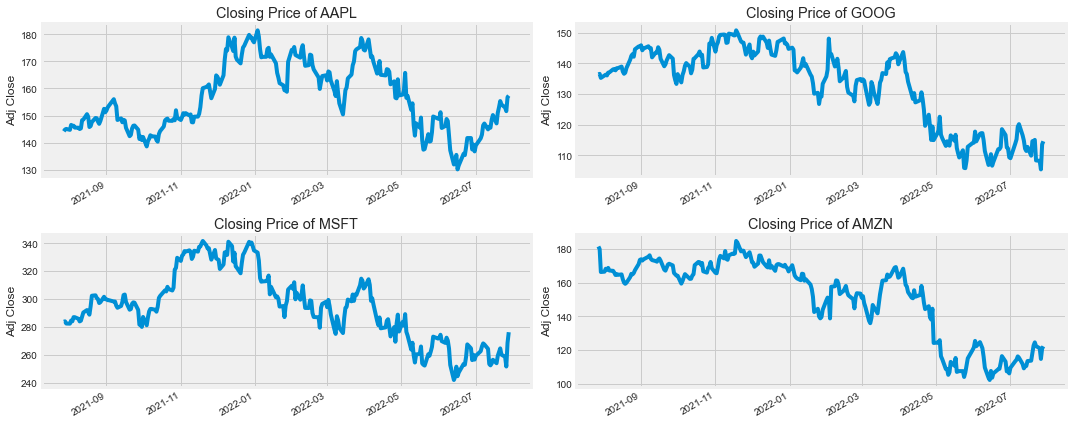

In [6]:

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Total Volumne of stocks being traded each day

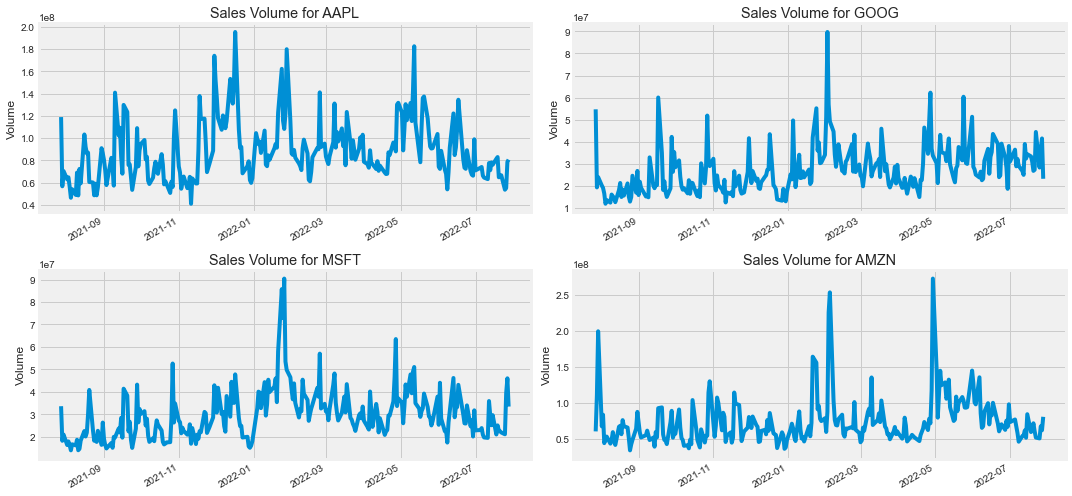

In [7]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## Calculating and plotting the moving averages for the 10,20, and 50 days for the stocks.

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

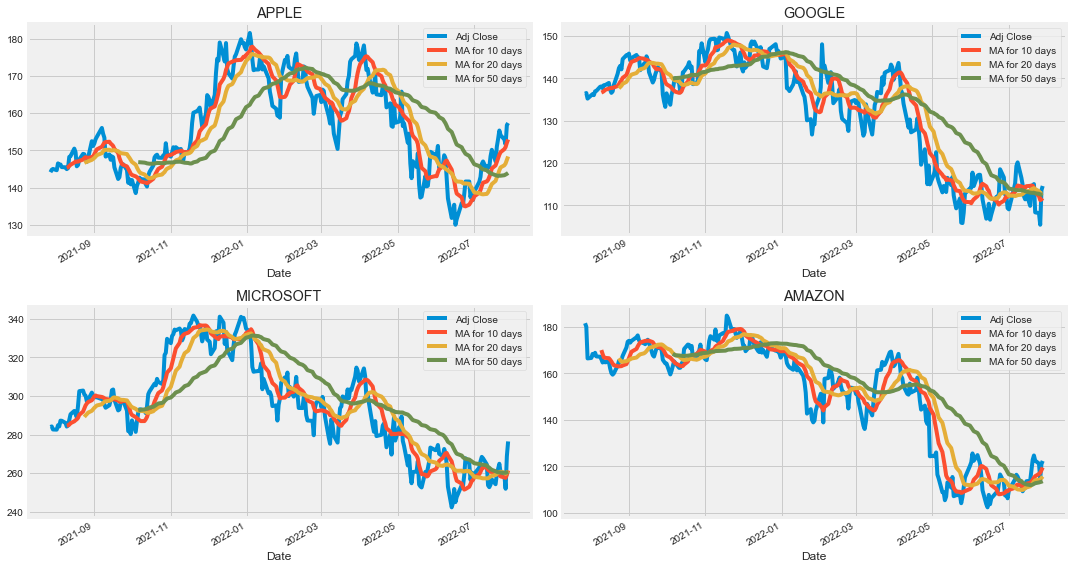

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Performing risk management on the Stocks and calculating the percent daily return for each day

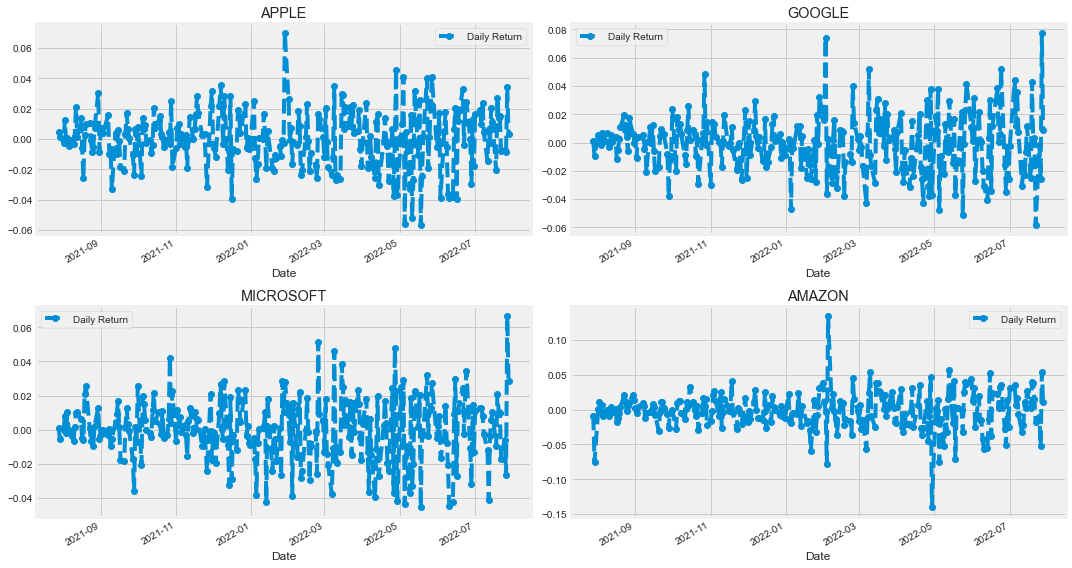

In [10]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
## Using pct_change in order to calucte the percentage change
    
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Now calucalting the average of the daily returns of the stocks of companies

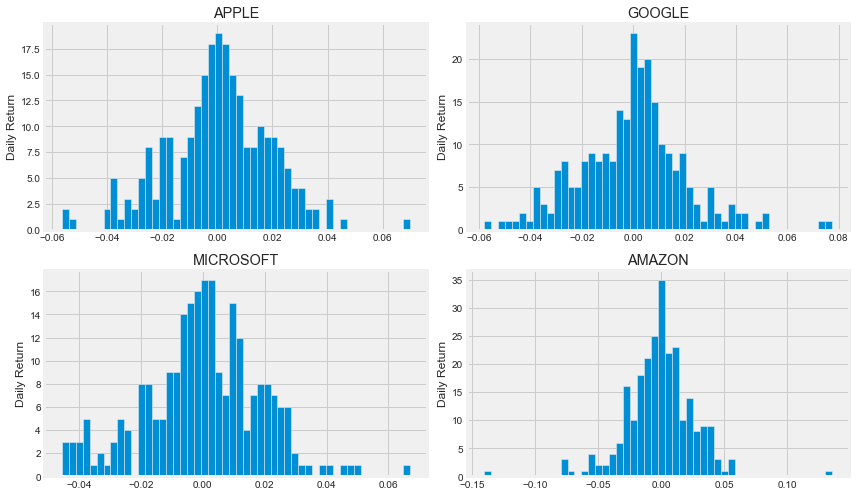

In [11]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## Creating a dataframe consisting of all the closing prices for the tech stocks

In [12]:

closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Having a peak at the closing prices
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-29,144.812653,136.540497,284.179504,179.996002
2021-07-30,145.031403,135.220993,282.602417,166.379501
2021-08-02,144.693344,135.989502,282.513153,166.574005
2021-08-03,146.522888,136.279999,284.794495,168.311996
2021-08-04,146.115219,136.028503,284.189453,167.735992


## Getting a daily return for all the stocks of all the closing prices using pct_change()

In [13]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-29,NaN,NaN,NaN,NaN
2021-07-30,0.001511,-0.009664,-0.005550,-0.075649
2021-08-02,-0.002331,0.005683,-0.000316,0.001169
2021-08-03,0.012644,0.002136,0.008075,0.010434
2021-08-04,-0.002782,-0.001845,-0.002124,-0.003422


## Correaltion of the daily returns and closing balances of all the tech stocks

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

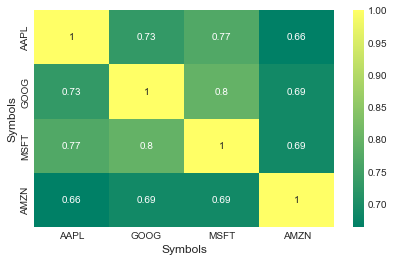

In [14]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

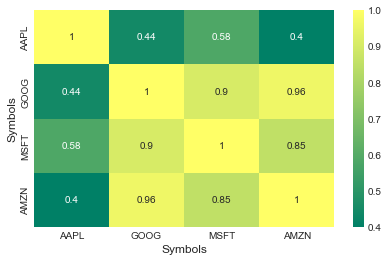

In [15]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

## Calcuting the risk of investing in a particualr stock by comparing the expected return with the standard deviation of the daily returns

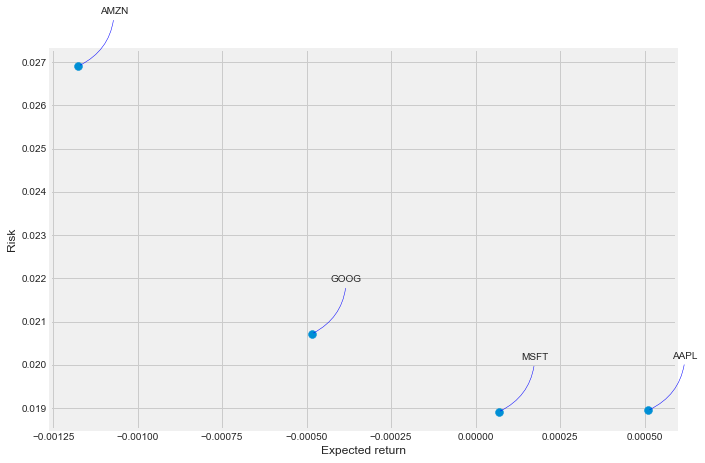

In [16]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


## Getting the closing stock price of APPLE INC and plotting it as well.

In [17]:
# Getting the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557465
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624950
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765111
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898556
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878095
...,...,...,...,...,...,...
2022-07-22,156.279999,153.410004,155.389999,154.089996,66625400.0,154.089996
2022-07-25,155.039993,152.279999,154.009995,152.949997,53623900.0,152.949997
2022-07-26,153.089996,150.800003,152.259995,151.600006,55138700.0,151.600006


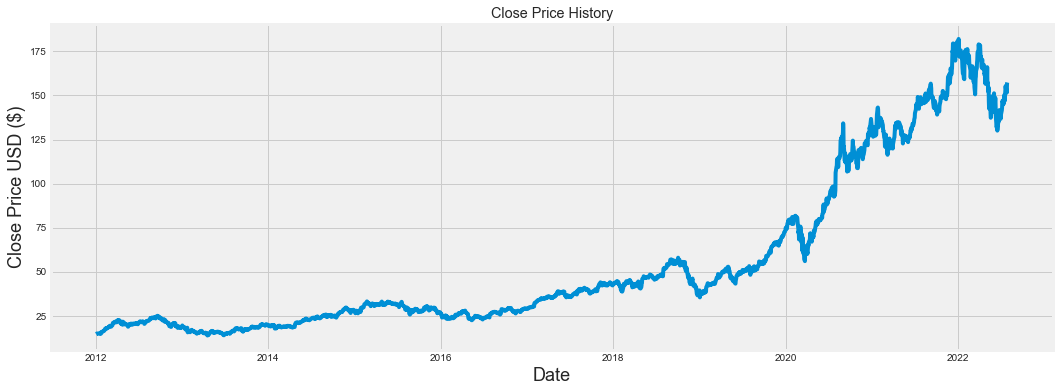

In [18]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## Creating a new dataframe with only the 'Close column'

In [19]:
data = df.filter(['Close'])

# Converting the dataframe to a numpy array

dataset = data.values

# splitting the data into train n test

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2527

## Normalizing the data using minmax

In [20]:
# Scaling  the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.81905547],
       [0.84993677],
       [0.85326894]])

## Split the data into x_train and y_train data sets

In [21]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Converting  the x_train and y_train to numpy arrays 

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

## Importing the sequestial and layers (Dense, LSTM)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Building the LSTM model by assiging the paramters

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compiling the model

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model on sigle epochs

model.fit(x_train, y_train, batch_size=1, epochs=1)

2467/2467 [==============================] - 54s 21ms/step - loss: 9.5199e-04


## Creating the testing splits and making the predictions used the trained model

In [23]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Converting the data to a numpy array

x_test = np.array(x_test)

# Reshaping the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Getting the predicted price values 

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculating root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8.383284839009454

## The low value of above rmse error proves that how accurate our model is

## Plotting the predictions agaisnt the date and evaluating the model

C:\Users\Mohsin\AppData\Local\Temp/ipykernel_16020/2882300990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


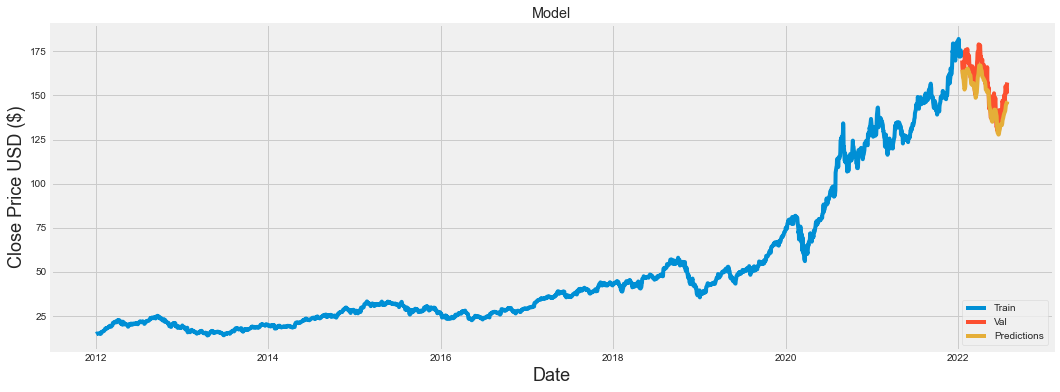

In [24]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [25]:
# Showing the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-01-18,169.800003,164.596451
2022-01-19,166.229996,163.869766
2022-01-20,164.509995,162.431961
2022-01-21,162.410004,160.707092
2022-01-24,161.619995,158.829544
...,...,...
2022-07-22,154.089996,144.388947
2022-07-25,152.949997,145.462006
2022-07-26,151.600006,145.963669
